In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the Data from San Francisco
sf = pd.read_csv(r"sanfrancisco_incidents_summer_2014.csv")

# Tenderloin is different!
## Analyzing crime in San Francisco's district "Tenderloin"

### Crime throughout the day - nothing unusual yet
Looking at the course of crime reports throughout the day in San Francisco as a whole and Tenderloin in specific, there is nothing unusual yet.

But to prepare the data for that, I will create a new column only containing the hour of when the crime was reported as an integer:

In [3]:
sf["hour"] = [datetime.strptime(x, "%H:%M").hour for x in sf["Time"]]

Then I create a second dataframe only containing the rows of Tenderloin

In [4]:
tenderloin = sf.loc[sf["PdDistrict"] == "TENDERLOIN"]

And finally the plots:

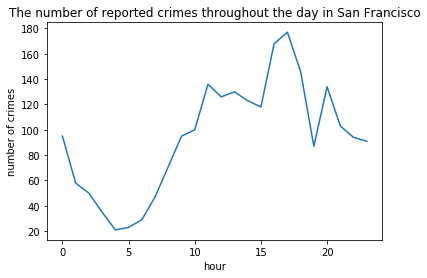

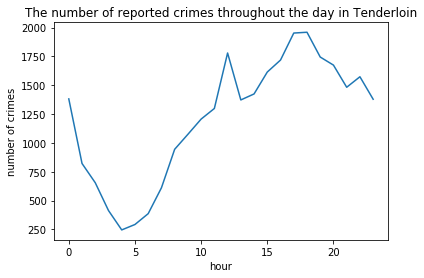

In [5]:
sns.lineplot(x=tenderloin["hour"].value_counts().sort_index().index, 
         y=tenderloin["hour"].value_counts().sort_index())
plt.xlabel("hour")
plt.ylabel("number of crimes")
plt.title("The number of reported crimes throughout the day in San Francisco")
plt.show()

sns.lineplot(x=sf["hour"].value_counts().sort_index().index, 
         y=sf["hour"].value_counts().sort_index())
plt.xlabel("hour")
plt.ylabel("number of crimes")
plt.title("The number of reported crimes throughout the day in Tenderloin")
plt.show()

Here we see no significant difference regarding the time of occurrence.

But:

### The categories of crime in Tenderloin differs from the whole city

If we take a look at the categories of crime, committed in Tenderloin and compare the to the city as a whole, we can see something interesting.

But first, I will drop the categories, that have less reports than 500 (in San Francisco as a whole), to make the plot more readable, since these will just be barely visible in the plots

In [6]:
droplist = sf.loc[(sf["Category"] == "ARSON") |
                 (sf["Category"] == "RUNAWAY") |
                 (sf["Category"] == "LIQUOR LAWS") |
                 (sf["Category"] == "DISORDERLY CONDUCT") |
                 (sf["Category"] == "FORGERY/COUNTERFEITING") |
                 (sf["Category"] == "VANDALISM") |
                 (sf["Category"] == "SUICIDE") |
                 (sf["Category"] == "FAMILY OFFENSES") |
                 (sf["Category"] == "EMBEZZLEMENT") |
                 (sf["Category"] == "STOLEN PROPERTY") |
                 (sf["Category"] == "EXTORTION") |
                 (sf["Category"] == "BURGLARY") |
                 (sf["Category"] == "LOITERING") |
                 (sf["Category"] == "PORNOGRAPHY/OBSCENE MAT") |
                 (sf["Category"] == "GAMBLING") |
                 (sf["Category"] == "DRIVING UNDER THE INFLUENCE") |
                 (sf["Category"] == "PROSTITUTION") |
                 (sf["Category"] == "KIDNAPPING") |
                 (sf["Category"] == "FRAUD") |
                 (sf["Category"] == "DRUNKENNESS") |
                 (sf["Category"] == "TRESPASS") |
                 (sf["Category"] == "WEAPON LAWS") |
                 (sf["Category"] == "SECONDARY CODES") |
                  (sf["Category"] == "ROBBERY") |
                 (sf["Category"] == "BRIBERY")].index

sf_dropped = sf.drop(droplist)
tenderloin_dropped = sf_dropped.loc[sf["PdDistrict"] == "TENDERLOIN"]

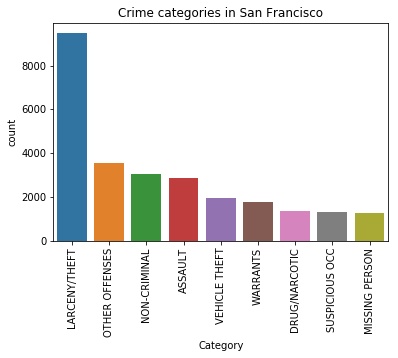

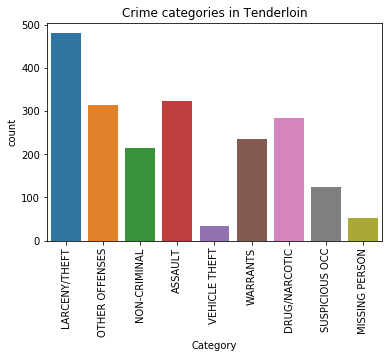

In [7]:
sns.countplot(data=sf_dropped, x="Category", order=sf_dropped["Category"].value_counts().index)
plt.xticks(rotation="vertical")
plt.title("Crime categories in San Francisco")
plt.show()

sns.countplot(data=tenderloin_dropped, x="Category", order=sf_dropped["Category"].value_counts().index)
plt.xticks(rotation="vertical")
plt.title("Crime categories in Tenderloin")
plt.show()

First thing popping out is the amount of vehicle thefts in Tenderloin.
Apparently it is quite safe to own a car in Tenderloin as it will probably not get stolen.

On the other hand, categories like Assault and Drug/Narcotic crimes are unusually high in this district. Maybe they are related? Sounds probable, but further studies can explore that.

### Want to watch the world burn? Tenderloin is not for you.
Let's assume, that you like fire. And you like it so much, that you would love to see a car burn as often as possible.

If that's the case, I would advice you not to move to tenderloin. Why? Look at this:

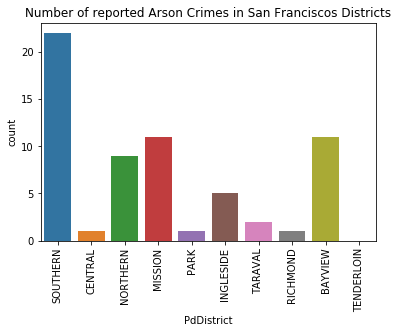

In [8]:
# get the columns containing "ARSON" in they category
arson = sf.loc[sf["Category"] == "ARSON"]

sns.countplot(data=arson, x="PdDistrict", 
                 order=["SOUTHERN", "CENTRAL", "NORTHERN", "MISSION", "PARK", "INGLESIDE", "TARAVAL", "RICHMOND", "BAYVIEW", "TENDERLOIN"])
plt.xticks(rotation="vertical")
plt.title("Number of reported Arson Crimes in San Franciscos Districts")
plt.show()

As you can see, there are no reported arson crimes in tenderloin during June, July and August. Pretty boring, right? You better move to the Southern district, there are much more flames!